In [ ]:
install.packages("pacman")

library(pacman)

pacman::p_load(arrow, openxlsx, readr, tidyr, dplyr, janitor, stringr, stringi)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘assertthat’


Warning message in utils::install.packages(package, ...):
“installation of package ‘arrow’ had non-zero exit status”
Warning message in p_install(package, character.only = TRUE, ...):
“”
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘arrow’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in utils::install.packages(package, ...):
“installation of package ‘openxlsx’ had non-zero exit status”
Warning message in p_install(package, character.only = TRUE, ...):
“”
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘openxlsx’”
Installing package into ‘/usr/local/lib/R/sit

**Estandarización de variables y homologación**

El flujo de trabajo visto a la fecha ha incluido los procesos de Importar, pivotear y limpiar las tablas de datos o data frames en R, ahora veremos dos procesos adicionales que nos ayudan a crear tablas consistentes, en la siguiente figura se puede ver dicho flujo:

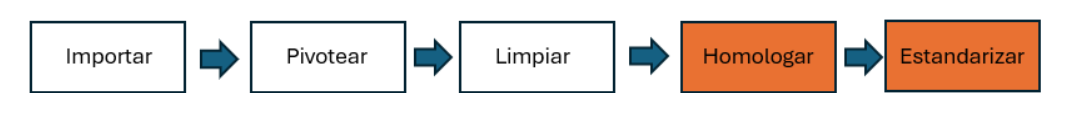

La homologación es el proceso de unificar los valores de una variable para que tengan el mismo formato, nombre o clasificación en diferentes fuentes de datos. Se utiliza para facilitar la integración, análisis y comparación de datos. Generalmete esta tarea se realiza en variables categoricas. La importancia de la tarea radica en:

1. Evita inconsistencias en el análisis de datos.

2. Permite la comparación entre datasets de diferentes fuentes o sistemas.

3. Mejora la calidad y confiabilidad de los informes.

4. Facilita el cruce de información y la automatización de procesos.

**Homologación mediante case_when**
Es una función de dplyr utilizada para reemplazar o transformar valores dentro de una columna. Útil cuando las reglas de homologación son simples y directas, se puede ver como una versión multiple de la sentencia if_else, su sintaxis es la siguiente:

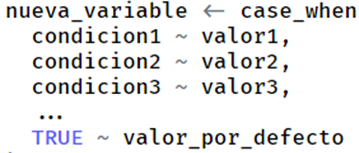

In [ ]:
#Ejemplo 1 case_when
library(dplyr)

#perpetradores originales

# Crear el vector de perpetradores
perpetradores_vector <- c("Ejército", "Fuerza pública", "Militares", "Policía Nacional",
                          "PN", "Guerrilla", "FARC", "ELN", "Desconocido", "N/A", NA)

# Crear el data frame
victimas <- data.frame(
  id = 1:length(perpetradores_vector),
  nombre_victima = paste("Víctima", 1:length(perpetradores_vector)),
  perpetrador = perpetradores_vector,
  stringsAsFactors = FALSE
)

print(victimas)





Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




   id nombre_victima      perpetrador
1   1      Víctima 1         Ejército
2   2      Víctima 2   Fuerza pública
3   3      Víctima 3        Militares
4   4      Víctima 4 Policía Nacional
5   5      Víctima 5               PN
6   6      Víctima 6        Guerrilla
7   7      Víctima 7             FARC
8   8      Víctima 8              ELN
9   9      Víctima 9      Desconocido
10 10     Víctima 10              N/A
11 11     Víctima 11             <NA>


In [ ]:
#Despues de la Homologacion
#Homologar en los siguientes perpetradores homologados

#c("Fuerza Pública","Grupos Armados Ilegales","No Identificado")

victimas <- victimas %>%
  mutate(perpetrador_homologado = case_when(
    perpetrador %in% c("Ejército", "Fuerza pública", "Militares",
                       "Policía Nacional", "PN") ~ "Fuerza Pública",
    perpetrador %in% c("Guerrilla", "FARC", "ELN") ~ "Grupos Armados Ilegales",
    perpetrador %in% c("Desconocido", "N/A") | is.na(perpetrador) ~ "No Identificado",
    TRUE ~ "Otro"
  ))

print(victimas)

   id nombre_victima      perpetrador  perpetrador_homologado
1   1      Víctima 1         Ejército          Fuerza Pública
2   2      Víctima 2   Fuerza pública          Fuerza Pública
3   3      Víctima 3        Militares          Fuerza Pública
4   4      Víctima 4 Policía Nacional          Fuerza Pública
5   5      Víctima 5               PN          Fuerza Pública
6   6      Víctima 6        Guerrilla Grupos Armados Ilegales
7   7      Víctima 7             FARC Grupos Armados Ilegales
8   8      Víctima 8              ELN Grupos Armados Ilegales
9   9      Víctima 9      Desconocido         No Identificado
10 10     Víctima 10              N/A         No Identificado
11 11     Víctima 11             <NA>         No Identificado


**Tablas maestras y Homologación con Join**



*   Cuando hay muchas reglas, es mejor usar una tabla maestra de homologación.
*   Las tablas maestras contienen los valores originales y su correspondiente valor homologado.
*   Se aplica un join para emparejar y reemplazar.



Proceso:

1. Tabla A: datos sin homologar
2. Tabla B: tabla maestra con columnas valor_original y valor_homologado
3. JOIN entre A y B para incorporar el valor homologado.





In [ ]:
# Tabla original
personas <- data.frame(
  id_persona = 1:5,
  nombre = c("Ana", "Luis", "Marta", "José", "Claudia"),
  oficio = c("Carpintera", "Obrero de construcción", "Albañil", "Carpintero", "Sin especificar")
)

print(personas)

  id_persona  nombre                 oficio
1          1     Ana             Carpintera
2          2    Luis Obrero de construcción
3          3   Marta                Albañil
4          4    José             Carpintero
5          5 Claudia        Sin especificar


In [ ]:
# Tabla maestra
maestra_oficios <- data.frame(
  oficio_original = c("Carpintera", "Carpintero", "Albañil", "Obrero de construcción"),
  oficio_homologado = c("Carpintería", "Carpintería", "Construcción", "Construcción")
)

print(maestra_oficios)

         oficio_original oficio_homologado
1             Carpintera       Carpintería
2             Carpintero       Carpintería
3                Albañil      Construcción
4 Obrero de construcción      Construcción


In [ ]:
# Homologación con join
personas_homologadas <- personas %>%
  left_join(maestra_oficios, by = c("oficio" = "oficio_original"))

print(personas_homologadas)

  id_persona  nombre                 oficio oficio_homologado
1          1     Ana             Carpintera       Carpintería
2          2    Luis Obrero de construcción      Construcción
3          3   Marta                Albañil      Construcción
4          4    José             Carpintero       Carpintería
5          5 Claudia        Sin especificar              <NA>


**Índices en la homologación**


*   Es clave tener un índice por registro para rastrear el valor original que fue homologado en caso de que se retire la columna original
*   Es útil para comprobar que una vez hecha una homologación, se conservan la misma cantidad de registros
* La homologación generalmente son relaciones entre tablas de muchos a 1, luego a cada registro de la tabla original le corresponde un único valor homologado.






Vamos con la tarea de **Estandarización**, que se refiere al proceso de dejar las tablas con un mismo formato para sus columnas. Aquí se unifica una estructura para todas las tablas, lo que implica:

1. Misma cantidad de columnas
2. Columnas con un tipo de valor especifico (int, chr, dbl, etc.)
3. Renombrar columnas según una estructura común para todas las bases de datos.
4. Si no existe una columna que es parte de la estructura común, se crea la columna y se llena con valores de NA.


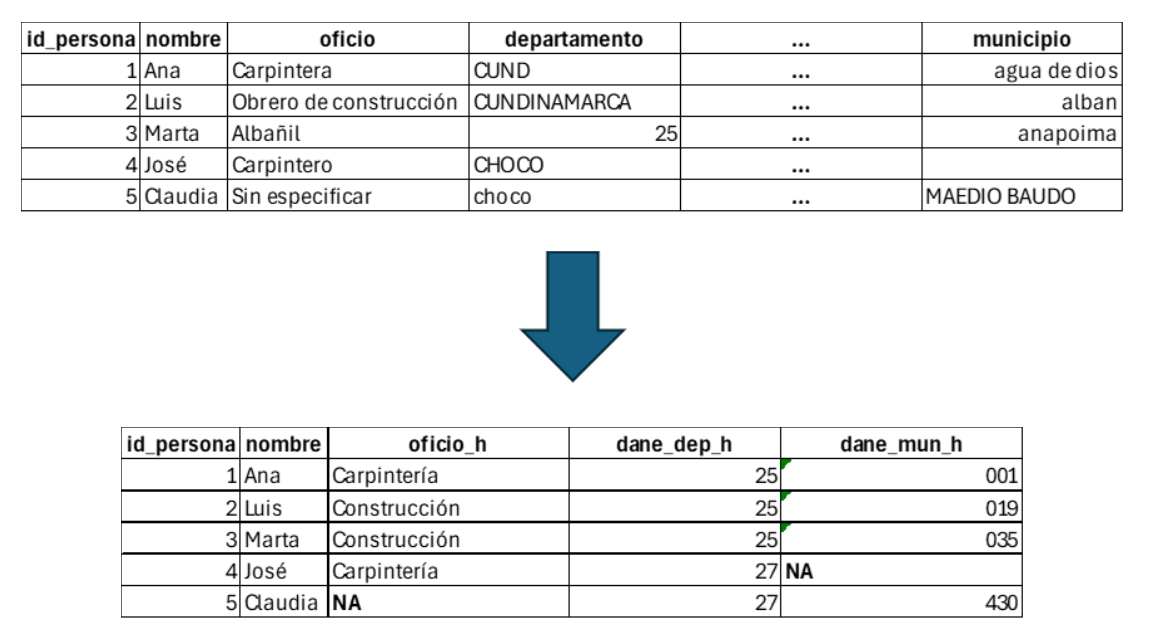



**Taller Homologación y estandarización**

**Objetivo:** Explorar herramientas y metodologías para integrar múltiples fuentes de datos en R de forma eficiente y reproducible usando el paquete dplyr
En la pagina https://micrositios.centrodememoriahistorica.gov.co/observatorio/portal-de-datos/base-de-datos/ cargar en R la tabla de Víctimas secuestros (VictimasSE_202503) y Víctimas minas (VictimasMI_202503)


In [ ]:

library(openxlsx)
Secuestro <- read.xlsx("VictimasSE_202503.xlsx")
head(Secuestro)


,ID.Caso,Código.DANE.de.Municipio,Municipio,Departamento,Año,Mes,Día,ID.Persona,Sexo,Etnia,⋯,Fuerza.o.Grupo.Armado.Organizado.al.que.Pertenece.el.Combatiente,Descripción.Fuerza.o.Grupo.Armado.Organizado.al.que.Pertenece.el.Combatiente,Situación.Actual.de.la.Víctima,Circunstancia.Muerte.en.Cautiverio,Tipo.de.Liberación,Días.de.Cautiverio,No..de.Veces.secuestrado,Edad,Latitud,Longitud
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,102517,27001,QUIBDO,CHOCO,2005,08,02,108989,HOMBRE,NA,⋯,NA,NA,MUERTO EN CAUTIVERIO,NA,NA,4,1,ADULTEZ (29-59 AÑOS),5.875260,-76.58361
2,103666,41359,ISNOS,HUILA,2014,07,13,115101,HOMBRE,NA,⋯,NA,NA,MUERTO EN CAUTIVERIO,NA,NA,6,1,ADULTEZ (29-59 AÑOS),1.945591,-76.18205
3,104360,41668,SAN AGUSTIN,HUILA,2006,12,21,110185,HOMBRE,NA,⋯,NA,NA,MUERTO EN CAUTIVERIO,NA,PAGO,33,2,NA,1.924165,-76.41657
4,104504,44001,RIOHACHA,LA GUAJIRA,1975,06,19,48620,HOMBRE,NA,⋯,NA,NA,MUERTO EN CAUTIVERIO,NA,NA,NA,0,NA,11.242972,-72.95876
5,110951,47745,SITIONUEVO,MAGDALENA,2005,09,26,109139,HOMBRE,NA,⋯,NA,NA,MUERTO EN CAUTIVERIO,NA,ND,8,1,NA,10.890276,-74.62966
6,113157,50313,GRANADA,META,2000,10,26,126784,HOMBRE,NA,⋯,NA,NA,MUERTO EN CAUTIVERIO,NA,NA,43,1,ADULTEZ (29-59 AÑOS),3.441051,-73.76115


In [ ]:
Minas <- read.xlsx("VictimasMI_202503.xlsx")
head(Minas)

,ID.Caso,Código.DANE.de.Municipio,Municipio,Departamento,Año,Mes,Día,ID.Persona,Sexo,Etnia,⋯,Tipo.de.Población.Vulnerable,Fuerza.o.Grupo.Armado.Organizado.al.que.Pertenece.el.Combatiente,Descripción.Fuerza.o.Grupo.Armado.Organizado.al.que.Pertenece.el.Combatiente,Situación.Actual.de.la.Víctima,Afectación.Heridos,Circunstancias.de.la.Muerte.de.la.Víctima,Actividad.Desarrollada.en.el.Momento.de.la.Afectación,Edad,Latitud,Longitud
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,113698,50325,MAPIRIPAN,META,2012,01,31,114026,HOMBRE,INDÍGENA,⋯,AUTORIDAD INDÍGENA,NA,NA,MUERTA,NA,MURIÓ EN EL LUGAR DE LOS HECHOS,SIN INFORMACIÓN,PERSONA MAYOR (60 AÑOS O MAS),3.1175234,-71.93806
2,116764,52835,SAN ANDRES DE TUMACO,NARIÑO,2012,08,10,199689,HOMBRE,INDÍGENA,⋯,NA,NA,NA,MUERTA,NA,MURIÓ EN EL LUGAR DE LOS HECHOS,TRÁNSITO POR TROCHA O CAMINO,ADOLESCENCIA (12-17 AÑOS),1.5745506,-78.61541
3,12200,05001,MEDELLIN,ANTIOQUIA,1998,03,18,20567,HOMBRE,NA,⋯,NA,AGENTE DEL ESTADO,EJÉRCITO NACIONAL,MUERTA,NA,SIN INFORMACIÓN,OPERACIONES MILITARES,JUVENTUD (18-28 AÑOS),6.2575903,-75.61103
4,139902,81794,TAME,ARAUCA,2005,01,24,198076,HOMBRE,NA,⋯,NA,NA,NA,MUERTA,NA,MURIÓ EN EL LUGAR DE LOS HECHOS,OTRA ¿CUÁL?,ADULTEZ (29-59 AÑOS),6.3906505,-71.79179
5,175352,86568,PUERTO ASIS,PUTUMAYO,1998,11,13,56517,HOMBRE,NA,⋯,NA,NA,NA,MUERTA,NA,MURIÓ EN EL LUGAR DE LOS HECHOS,"ACTIVIDADES AGROPECUARIAS, CAZA O PESCA",NA,0.5946628,-76.56694
6,175352,86568,PUERTO ASIS,PUTUMAYO,1998,11,13,56518,HOMBRE,NA,⋯,NA,NA,NA,MUERTA,NA,MURIÓ EN EL LUGAR DE LOS HECHOS,"ACTIVIDADES AGROPECUARIAS, CAZA O PESCA",INFANCIA (6-11 AÑOS),0.5946628,-76.56694


**Punto 1**
Genere un identificador_unico para cada registro de la tablas


In [ ]:
# prompt: crea un identificador unico para cada registro de la tabla, puede ser el numero de la fila pegado a SE, poner el identificador unico al principio
library(dplyr)
Secuestro$identificador_unico <- paste0("SE", 1:nrow(Secuestro))
Secuestro <- Secuestro%>%
  select(identificador_unico, everything())
head(Secuestro)

Minas$identificador_unico <- paste0("MI", 1:nrow(Minas))
Minas <- Minas%>%
  select(identificador_unico, everything())
head(Minas)

,identificador_unico,ID.Caso,Código.DANE.de.Municipio,Municipio,Departamento,Año,Mes,Día,ID.Persona,Sexo,⋯,Descripción.Fuerza.o.Grupo.Armado.Organizado.al.que.Pertenece.el.Combatiente,Situación.Actual.de.la.Víctima,Circunstancia.Muerte.en.Cautiverio,Tipo.de.Liberación,Días.de.Cautiverio,No..de.Veces.secuestrado,Edad,Latitud,Longitud,pertenencia_etnica
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,SE1,102517,27001,QUIBDO,CHOCO,2005,08,02,108989,HOMBRE,⋯,NA,MUERTO EN CAUTIVERIO,NA,NA,4,1,ADULTEZ (29-59 AÑOS),5.875260,-76.58361,NA
2,SE2,103666,41359,ISNOS,HUILA,2014,07,13,115101,HOMBRE,⋯,NA,MUERTO EN CAUTIVERIO,NA,NA,6,1,ADULTEZ (29-59 AÑOS),1.945591,-76.18205,NA
3,SE3,104360,41668,SAN AGUSTIN,HUILA,2006,12,21,110185,HOMBRE,⋯,NA,MUERTO EN CAUTIVERIO,NA,PAGO,33,2,NA,1.924165,-76.41657,NA
4,SE4,104504,44001,RIOHACHA,LA GUAJIRA,1975,06,19,48620,HOMBRE,⋯,NA,MUERTO EN CAUTIVERIO,NA,NA,NA,0,NA,11.242972,-72.95876,NA
5,SE5,110951,47745,SITIONUEVO,MAGDALENA,2005,09,26,109139,HOMBRE,⋯,NA,MUERTO EN CAUTIVERIO,NA,ND,8,1,NA,10.890276,-74.62966,NA
6,SE6,113157,50313,GRANADA,META,2000,10,26,126784,HOMBRE,⋯,NA,MUERTO EN CAUTIVERIO,NA,NA,43,1,ADULTEZ (29-59 AÑOS),3.441051,-73.76115,NA


,identificador_unico,ID.Caso,Código.DANE.de.Municipio,Municipio,Departamento,Año,Mes,Día,ID.Persona,Sexo,⋯,Fuerza.o.Grupo.Armado.Organizado.al.que.Pertenece.el.Combatiente,Descripción.Fuerza.o.Grupo.Armado.Organizado.al.que.Pertenece.el.Combatiente,Situación.Actual.de.la.Víctima,Afectación.Heridos,Circunstancias.de.la.Muerte.de.la.Víctima,Actividad.Desarrollada.en.el.Momento.de.la.Afectación,Edad,Latitud,Longitud,pertenencia_etnica
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,MI1,113698,50325,MAPIRIPAN,META,2012,01,31,114026,HOMBRE,⋯,NA,NA,MUERTA,NA,MURIÓ EN EL LUGAR DE LOS HECHOS,SIN INFORMACIÓN,PERSONA MAYOR (60 AÑOS O MAS),3.1175234,-71.93806,1
2,MI2,116764,52835,SAN ANDRES DE TUMACO,NARIÑO,2012,08,10,199689,HOMBRE,⋯,NA,NA,MUERTA,NA,MURIÓ EN EL LUGAR DE LOS HECHOS,TRÁNSITO POR TROCHA O CAMINO,ADOLESCENCIA (12-17 AÑOS),1.5745506,-78.61541,1
3,MI3,12200,05001,MEDELLIN,ANTIOQUIA,1998,03,18,20567,HOMBRE,⋯,AGENTE DEL ESTADO,EJÉRCITO NACIONAL,MUERTA,NA,SIN INFORMACIÓN,OPERACIONES MILITARES,JUVENTUD (18-28 AÑOS),6.2575903,-75.61103,NA
4,MI4,139902,81794,TAME,ARAUCA,2005,01,24,198076,HOMBRE,⋯,NA,NA,MUERTA,NA,MURIÓ EN EL LUGAR DE LOS HECHOS,OTRA ¿CUÁL?,ADULTEZ (29-59 AÑOS),6.3906505,-71.79179,NA
5,MI5,175352,86568,PUERTO ASIS,PUTUMAYO,1998,11,13,56517,HOMBRE,⋯,NA,NA,MUERTA,NA,MURIÓ EN EL LUGAR DE LOS HECHOS,"ACTIVIDADES AGROPECUARIAS, CAZA O PESCA",NA,0.5946628,-76.56694,NA
6,MI6,175352,86568,PUERTO ASIS,PUTUMAYO,1998,11,13,56518,HOMBRE,⋯,NA,NA,MUERTA,NA,MURIÓ EN EL LUGAR DE LOS HECHOS,"ACTIVIDADES AGROPECUARIAS, CAZA O PESCA",INFANCIA (6-11 AÑOS),0.5946628,-76.56694,NA


**Punto 2:**
Cree una nueva variable que indique si la persona pertenece a un grupo étnico (pert_gp_etnico), 1 si pertenece, 0 si no pertenece o NA si no se tiene información, utilice la función case_when para este punto

In [ ]:
Secuestro<-Secuestro%>%
  mutate(pert_gp_etnico=case_when(
  Etnia=="NINGÚN GRUPO ÉTNICO"~0,
  !is.na(Etnia)~1,
  TRUE ~ NA
  ))
head(Secuestro)

Minas<-Minas%>%
  mutate(pert_gp_etnico=case_when(
  Etnia=="NINGÚN GRUPO ÉTNICO"~0,
  !is.na(Etnia)~1,
  TRUE ~ NA
  ))
head(Minas)

,identificador_unico,ID.Caso,Código.DANE.de.Municipio,Municipio,Departamento,Año,Mes,Día,ID.Persona,Sexo,⋯,Situación.Actual.de.la.Víctima,Circunstancia.Muerte.en.Cautiverio,Tipo.de.Liberación,Días.de.Cautiverio,No..de.Veces.secuestrado,Edad,Latitud,Longitud,pertenencia_etnica,pert_gp_etnico
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,SE1,102517,27001,QUIBDO,CHOCO,2005,08,02,108989,HOMBRE,⋯,MUERTO EN CAUTIVERIO,NA,NA,4,1,ADULTEZ (29-59 AÑOS),5.875260,-76.58361,NA,NA
2,SE2,103666,41359,ISNOS,HUILA,2014,07,13,115101,HOMBRE,⋯,MUERTO EN CAUTIVERIO,NA,NA,6,1,ADULTEZ (29-59 AÑOS),1.945591,-76.18205,NA,NA
3,SE3,104360,41668,SAN AGUSTIN,HUILA,2006,12,21,110185,HOMBRE,⋯,MUERTO EN CAUTIVERIO,NA,PAGO,33,2,NA,1.924165,-76.41657,NA,NA
4,SE4,104504,44001,RIOHACHA,LA GUAJIRA,1975,06,19,48620,HOMBRE,⋯,MUERTO EN CAUTIVERIO,NA,NA,NA,0,NA,11.242972,-72.95876,NA,NA
5,SE5,110951,47745,SITIONUEVO,MAGDALENA,2005,09,26,109139,HOMBRE,⋯,MUERTO EN CAUTIVERIO,NA,ND,8,1,NA,10.890276,-74.62966,NA,NA
6,SE6,113157,50313,GRANADA,META,2000,10,26,126784,HOMBRE,⋯,MUERTO EN CAUTIVERIO,NA,NA,43,1,ADULTEZ (29-59 AÑOS),3.441051,-73.76115,NA,NA


,identificador_unico,ID.Caso,Código.DANE.de.Municipio,Municipio,Departamento,Año,Mes,Día,ID.Persona,Sexo,⋯,Descripción.Fuerza.o.Grupo.Armado.Organizado.al.que.Pertenece.el.Combatiente,Situación.Actual.de.la.Víctima,Afectación.Heridos,Circunstancias.de.la.Muerte.de.la.Víctima,Actividad.Desarrollada.en.el.Momento.de.la.Afectación,Edad,Latitud,Longitud,pertenencia_etnica,pert_gp_etnico
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,MI1,113698,50325,MAPIRIPAN,META,2012,01,31,114026,HOMBRE,⋯,NA,MUERTA,NA,MURIÓ EN EL LUGAR DE LOS HECHOS,SIN INFORMACIÓN,PERSONA MAYOR (60 AÑOS O MAS),3.1175234,-71.93806,1,1
2,MI2,116764,52835,SAN ANDRES DE TUMACO,NARIÑO,2012,08,10,199689,HOMBRE,⋯,NA,MUERTA,NA,MURIÓ EN EL LUGAR DE LOS HECHOS,TRÁNSITO POR TROCHA O CAMINO,ADOLESCENCIA (12-17 AÑOS),1.5745506,-78.61541,1,1
3,MI3,12200,05001,MEDELLIN,ANTIOQUIA,1998,03,18,20567,HOMBRE,⋯,EJÉRCITO NACIONAL,MUERTA,NA,SIN INFORMACIÓN,OPERACIONES MILITARES,JUVENTUD (18-28 AÑOS),6.2575903,-75.61103,NA,NA
4,MI4,139902,81794,TAME,ARAUCA,2005,01,24,198076,HOMBRE,⋯,NA,MUERTA,NA,MURIÓ EN EL LUGAR DE LOS HECHOS,OTRA ¿CUÁL?,ADULTEZ (29-59 AÑOS),6.3906505,-71.79179,NA,NA
5,MI5,175352,86568,PUERTO ASIS,PUTUMAYO,1998,11,13,56517,HOMBRE,⋯,NA,MUERTA,NA,MURIÓ EN EL LUGAR DE LOS HECHOS,"ACTIVIDADES AGROPECUARIAS, CAZA O PESCA",NA,0.5946628,-76.56694,NA,NA
6,MI6,175352,86568,PUERTO ASIS,PUTUMAYO,1998,11,13,56518,HOMBRE,⋯,NA,MUERTA,NA,MURIÓ EN EL LUGAR DE LOS HECHOS,"ACTIVIDADES AGROPECUARIAS, CAZA O PESCA",INFANCIA (6-11 AÑOS),0.5946628,-76.56694,NA,NA


**Punto 3:** Realice homologación de la variable Ocupación donde la variable homologada solo tome 4 categorías, cree una tabla maestra para este punto (elija usted las 4 categorías)]


In [ ]:
unique(Secuestro$`Ocupación`)

profesiones_homologadas_SE <- data.frame(
  Ocupación = c(
    "SIN INFORMACIÓN", "NO APLICA", "OTRA ¿CUÁL?", "TRABAJO SIN ESPECIFICAR",
    "ESTUDIANTE", "AMA DE CASA",
    "PROFESIONAL", "PERSONAL DE SALUD", "FUNCIONARIO PÚBLICO", "EMPLEADO",
    "COMERCIANTE", "ECONOMÍA INFORMAL", "CONDUCTOR/MOTORISTA", "OBRERO", "MINERO", "RASPACHÍN", "ERRADICADOR",
    "TRABAJADOR DE FINCA", "CAMPESINO", "GANADERO/HACENDADO", "ADMINISTRADOR DE FINCA", "PESCADOR",
    "FUERZA PÚBLICA", "PARAMILITAR", "GUERRILLERO", "BANDOLERO", "MIEMBRO DE GRUPO POSDESMOVILIZACIÓN"
  ),
  ocupacion_h = c(
    "NO SABE / NO RESPONDE", "NO SABE / NO RESPONDE", "NO SABE / NO RESPONDE", "NO SABE / NO RESPONDE",
    "ESTUDIANTE / AMA DE CASA", "ESTUDIANTE / AMA DE CASA",
    "OCUPACIÓN FORMAL/INFORMAL/RURAL", "OCUPACIÓN FORMAL/INFORMAL/RURAL", "OCUPACIÓN FORMAL/INFORMAL/RURAL", "OCUPACIÓN FORMAL/INFORMAL/RURAL",
    "OCUPACIÓN FORMAL/INFORMAL/RURAL", "OCUPACIÓN FORMAL/INFORMAL/RURAL", "OCUPACIÓN FORMAL/INFORMAL/RURAL", "OCUPACIÓN FORMAL/INFORMAL/RURAL",
    "OCUPACIÓN FORMAL/INFORMAL/RURAL", "OCUPACIÓN FORMAL/INFORMAL/RURAL", "OCUPACIÓN FORMAL/INFORMAL/RURAL",
    "OCUPACIÓN FORMAL/INFORMAL/RURAL", "OCUPACIÓN FORMAL/INFORMAL/RURAL", "OCUPACIÓN FORMAL/INFORMAL/RURAL", "OCUPACIÓN FORMAL/INFORMAL/RURAL", "OCUPACIÓN FORMAL/INFORMAL/RURAL",
    "GRUPO ARMADO / FUERZA PÚBLICA", "GRUPO ARMADO / FUERZA PÚBLICA", "GRUPO ARMADO / FUERZA PÚBLICA",
    "GRUPO ARMADO / FUERZA PÚBLICA", "GRUPO ARMADO / FUERZA PÚBLICA"
  ),
  stringsAsFactors = FALSE
)

Secuestro_con_profesiones <- left_join(Secuestro, profesiones_homologadas_SE, by = "Ocupación")
head(Secuestro_con_profesiones)


[1] "MINERO"                              "CAMPESINO"                          
 [3] "CONDUCTOR/MOTORISTA"                 "FUNCIONARIO PÚBLICO"                
 [5] "ECONOMÍA INFORMAL"                   "COMERCIANTE"                        
 [7] "FUERZA PÚBLICA"                      "EMPLEADO"                           
 [9] "SIN INFORMACIÓN"                     "TRABAJO SIN ESPECIFICAR"            
[11] "GANADERO/HACENDADO"                  "OBRERO"                             
[13] "RELIGIOSO"                           "PROFESIONAL"                        
[15] "GUERRILLERO"                         "ADMINISTRADOR DE FINCA"             
[17] "TRABAJADOR DE FINCA"                 "OTRA ¿CUÁL?"                        
[19] "EMPRESARIO - INDUSTRIAL"             "ESTUDIANTE"                         
[21] "AMA DE CASA"                         "PERSONAL DE SALUD"                  
[23] "NO APLICA"                           "DELINCUENTE"                        
[25] "SEGURIDAD PRIVADA"                   "DESEMPLEADO"                        
[27] "PESCADOR"                            "RASPACHÍN"                          
[29] "TRABAJADOR(A) SEXUAL"                "PARAMILITAR"                        
[31] "MIEMBRO DE GRUPO POSDESMOVILIZACIÓN" "PENSIONADO"

,identificador_unico,ID.Caso,Código.DANE.de.Municipio,Municipio,Departamento,Año,Mes,Día,ID.Persona,Sexo,⋯,Circunstancia.Muerte.en.Cautiverio,Tipo.de.Liberación,Días.de.Cautiverio,No..de.Veces.secuestrado,Edad,Latitud,Longitud,pertenencia_etnica,pert_gp_etnico,ocupacion_h
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,SE1,102517,27001,QUIBDO,CHOCO,2005,08,02,108989,HOMBRE,⋯,NA,NA,4,1,ADULTEZ (29-59 AÑOS),5.875260,-76.58361,NA,NA,OCUPACIÓN FORMAL/INFORMAL/RURAL
2,SE2,103666,41359,ISNOS,HUILA,2014,07,13,115101,HOMBRE,⋯,NA,NA,6,1,ADULTEZ (29-59 AÑOS),1.945591,-76.18205,NA,NA,OCUPACIÓN FORMAL/INFORMAL/RURAL
3,SE3,104360,41668,SAN AGUSTIN,HUILA,2006,12,21,110185,HOMBRE,⋯,NA,PAGO,33,2,NA,1.924165,-76.41657,NA,NA,OCUPACIÓN FORMAL/INFORMAL/RURAL
4,SE4,104504,44001,RIOHACHA,LA GUAJIRA,1975,06,19,48620,HOMBRE,⋯,NA,NA,NA,0,NA,11.242972,-72.95876,NA,NA,OCUPACIÓN FORMAL/INFORMAL/RURAL
5,SE5,110951,47745,SITIONUEVO,MAGDALENA,2005,09,26,109139,HOMBRE,⋯,NA,ND,8,1,NA,10.890276,-74.62966,NA,NA,OCUPACIÓN FORMAL/INFORMAL/RURAL
6,SE6,113157,50313,GRANADA,META,2000,10,26,126784,HOMBRE,⋯,NA,NA,43,1,ADULTEZ (29-59 AÑOS),3.441051,-73.76115,NA,NA,OCUPACIÓN FORMAL/INFORMAL/RURAL


In [ ]:
unique(Minas$`Ocupación`)
profesiones_homologadas_MI <- data.frame(
  Ocupación = c("SIN INFORMACIÓN","ESTUDIANTE","FUERZA PÚBLICA","TRABAJADOR DE FINCA","CAMPESINO","PARAMILITAR","ERRADICADOR","AMA DE CASA","PROFESIONAL","NO APLICA","OBRERO","OTRA ¿CUÁL?","GUERRILLERO","RASPACHÍN","TRABAJO SIN ESPECIFICAR","CONDUCTOR/MOTORISTA","COMERCIANTE","EMPLEADO","MINERO","ADMINISTRADOR DE FINCA","PERSONAL DE SALUD","PESCADOR","GANADERO/HACENDADO","FUNCIONARIO PÚBLICO","ECONOMÍA INFORMAL","BANDOLERO","MIEMBRO DE GRUPO POSDESMOVILIZACIÓN"),
  ocupacion_h = c("NO SABE / NO RESPONDE","ESTUDIANTE / AMA DE CASA","GRUPO ARMADO / FUERZA PÚBLICA","OCUPACIÓN FORMAL/INFORMAL/RURAL","OCUPACIÓN FORMAL/INFORMAL/RURAL","GRUPO ARMADO / FUERZA PÚBLICA","OCUPACIÓN FORMAL/INFORMAL/RURAL","ESTUDIANTE / AMA DE CASA","OCUPACIÓN FORMAL/INFORMAL/RURAL","NO SABE / NO RESPONDE","OCUPACIÓN FORMAL/INFORMAL/RURAL","NO SABE / NO RESPONDE","GRUPO ARMADO / FUERZA PÚBLICA","OCUPACIÓN FORMAL/INFORMAL/RURAL","NO SABE / NO RESPONDE","OCUPACIÓN FORMAL/INFORMAL/RURAL","OCUPACIÓN FORMAL/INFORMAL/RURAL","OCUPACIÓN FORMAL/INFORMAL/RURAL","OCUPACIÓN FORMAL/INFORMAL/RURAL","OCUPACIÓN FORMAL/INFORMAL/RURAL","OCUPACIÓN FORMAL/INFORMAL/RURAL","OCUPACIÓN FORMAL/INFORMAL/RURAL","OCUPACIÓN FORMAL/INFORMAL/RURAL","OCUPACIÓN FORMAL/INFORMAL/RURAL","OCUPACIÓN FORMAL/INFORMAL/RURAL","GRUPO ARMADO / FUERZA PÚBLICA","GRUPO ARMADO / FUERZA PÚBLICA"),
  stringsAsFactors = FALSE
)

Minas_con_profesiones <- left_join(Minas, profesiones_homologadas_MI, by = "Ocupación")
head(Secuestro_con_profesiones)

[1] "SIN INFORMACIÓN"                     "ESTUDIANTE"                         
 [3] "FUERZA PÚBLICA"                      "TRABAJADOR DE FINCA"                
 [5] "CAMPESINO"                           "PARAMILITAR"                        
 [7] "ERRADICADOR"                         "AMA DE CASA"                        
 [9] "PROFESIONAL"                         "NO APLICA"                          
[11] "OBRERO"                              "OTRA ¿CUÁL?"                        
[13] "GUERRILLERO"                         "RASPACHÍN"                          
[15] "TRABAJO SIN ESPECIFICAR"             "CONDUCTOR/MOTORISTA"                
[17] "COMERCIANTE"                         "EMPLEADO"                           
[19] "MINERO"                              "ADMINISTRADOR DE FINCA"             
[21] "PERSONAL DE SALUD"                   "PESCADOR"                           
[23] "GANADERO/HACENDADO"                  "FUNCIONARIO PÚBLICO"                
[25] "ECONOMÍA INFORMAL"                   "BANDOLERO"                          
[27] "MIEMBRO DE GRUPO POSDESMOVILIZACIÓN"

,identificador_unico,ID.Caso,Código.DANE.de.Municipio,Municipio,Departamento,Año,Mes,Día,ID.Persona,Sexo,⋯,Circunstancia.Muerte.en.Cautiverio,Tipo.de.Liberación,Días.de.Cautiverio,No..de.Veces.secuestrado,Edad,Latitud,Longitud,pertenencia_etnica,pert_gp_etnico,ocupacion_h
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,SE1,102517,27001,QUIBDO,CHOCO,2005,08,02,108989,HOMBRE,⋯,NA,NA,4,1,ADULTEZ (29-59 AÑOS),5.875260,-76.58361,NA,NA,OCUPACIÓN FORMAL/INFORMAL/RURAL
2,SE2,103666,41359,ISNOS,HUILA,2014,07,13,115101,HOMBRE,⋯,NA,NA,6,1,ADULTEZ (29-59 AÑOS),1.945591,-76.18205,NA,NA,OCUPACIÓN FORMAL/INFORMAL/RURAL
3,SE3,104360,41668,SAN AGUSTIN,HUILA,2006,12,21,110185,HOMBRE,⋯,NA,PAGO,33,2,NA,1.924165,-76.41657,NA,NA,OCUPACIÓN FORMAL/INFORMAL/RURAL
4,SE4,104504,44001,RIOHACHA,LA GUAJIRA,1975,06,19,48620,HOMBRE,⋯,NA,NA,NA,0,NA,11.242972,-72.95876,NA,NA,OCUPACIÓN FORMAL/INFORMAL/RURAL
5,SE5,110951,47745,SITIONUEVO,MAGDALENA,2005,09,26,109139,HOMBRE,⋯,NA,ND,8,1,NA,10.890276,-74.62966,NA,NA,OCUPACIÓN FORMAL/INFORMAL/RURAL
6,SE6,113157,50313,GRANADA,META,2000,10,26,126784,HOMBRE,⋯,NA,NA,43,1,ADULTEZ (29-59 AÑOS),3.441051,-73.76115,NA,NA,OCUPACIÓN FORMAL/INFORMAL/RURAL


**Punto 4:** Estandarice las tablas seleccionando únicamente las variables, identificador_unico, cod_dane_dep, cod_dane_mun, Año, Mes, Día, Etnia, pert_gp_etnico, ocupación_h.


In [ ]:
Secuestro_con_profesiones<- Secuestro_con_profesiones%>%
  select(identificador_unico,Código.DANE.de.Municipio,Año,Mes,Día,Etnia,pert_gp_etnico, ocupacion_h)

Minas_con_profesiones<- Minas_con_profesiones%>%
  select(identificador_unico,Código.DANE.de.Municipio,Año,Mes,Día,Etnia,pert_gp_etnico, ocupacion_h)



**Punto 5:** Verifique que la cantidad de registros de la tabla original se mantienen en la tabla estandarizada


In [ ]:
nrow(Secuestro)==nrow(Secuestro_con_profesiones)
nrow(Minas)==nrow(Minas_con_profesiones)

[1] TRUE

[1] TRUE

**Punto 6:** Unifique las tablas anteriores


In [ ]:
tabla_final<-rbind(Secuestro_con_profesiones,Minas_con_profesiones)


Funciones y parámetros para la implementación de buenas prácticas en el manejo de valores faltantes


